In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import false_discovery_control
from sklearn.metrics import roc_auc_score
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
from rdkit import Chem

In [2]:
# Nature-style rcParams
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.minor.size': 1.5,
    'ytick.minor.size': 1.5,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [3]:
ca2pred = np.load("../mini-automl/adversarial_ca2_dude_pred.npy")

In [4]:
sum(ca2pred)/len(ca2pred)

0.22449167436444842

In [5]:
numactive = 492
activepred = ca2pred[:numactive]
decoypred = ca2pred[numactive:]

In [6]:
pairs = [(ca2pred[i], i < 492) for i in range(len(ca2pred))]
top1p = sorted(pairs, key=lambda x:-x[0])[:len(ca2pred)//100]
count = len([x for x in top1p if x[1]])
expected_count = numactive/len(ca2pred)*(len(ca2pred)//100)
lift = count/expected_count
lift

12.219435010805805

In [7]:
roc_auc_score([1]*numactive+[0]*(len(ca2pred)-numactive), ca2pred)

0.8131592112013643

In [8]:
sum(activepred)/len(activepred) - sum(decoypred)/len(decoypred)

0.30456586248973927

In [8]:
stats.mannwhitneyu(activepred, decoypred, alternative='greater')

MannwhitneyuResult(statistic=12470717.0, pvalue=2.831859434426781e-126)

kernels


/var/folders/y_/2d6q3v617qj78nxjx8b1_2wc0000gn/T/ipykernel_93486/1359408324.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


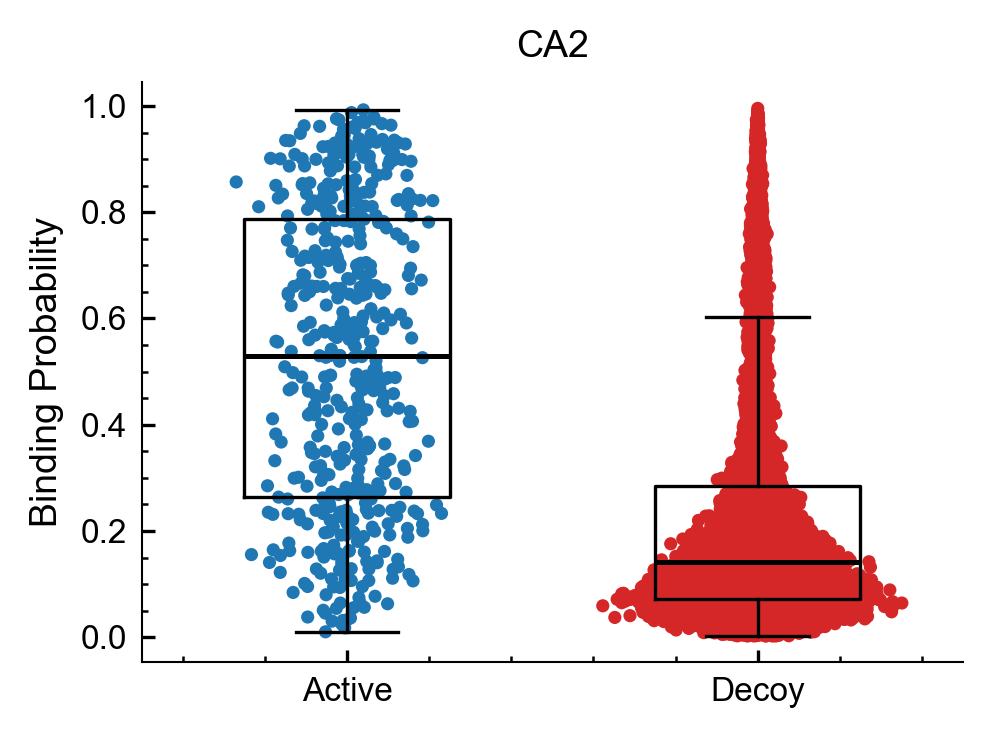

In [9]:
data = [activepred, decoypred]
kernels = [stats.gaussian_kde(x) for x in data]
print("kernels")
densities = [kernels[i](data[i]) for i in range(len(data))]
maxes = [max(x) for x in densities]
spreads = [np.array([x/maxes[i] for x in densities[i]]) for i in range(len(data))]
labels=["Active", "Decoy"]
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Boxplot with higher zorder
bp = ax.boxplot(
    data,
    labels=labels,
    showfliers=False,
    boxprops=dict(linewidth=0.8, color='black', zorder=3),
    whiskerprops=dict(linewidth=0.8, color='black', zorder=3),
    capprops=dict(linewidth=0.8, color='black', zorder=3),
    medianprops=dict(linewidth=1.2, color='black', zorder=3),
    widths=0.5
)

# Scatter points with lower zorder
point_colors = ['#1f77b4', '#d62728']
for i, group_data in enumerate(data):
    #x = np.random.normal(i+1, 0.06, size=len(group_data))
    x = np.random.normal(0, 0.1, size=len(group_data)) * spreads[i] + np.ones(len(group_data)) * (i+1)
    ax.scatter(
        x, group_data,
        color=point_colors[i % 2],
        alpha=1,
        s=10,
        edgecolors='none',
        zorder=2
    )
ax.set_title("CA2")
ax.set_ylabel("Binding Probability", labelpad=4)
ax.minorticks_on()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
with open("../DUD-E/cah2/actives_final.ism", "r") as file:
    txt = file.read()
    lines = txt.split("\n")
    active_smiles = [line.split(" ")[0] for line in lines]
with open("../DUD-E/cah2/decoys_final.ism", "r") as file:
    txt = file.read()
    lines = txt.split("\n")
    decoy_smiles = [line.split(" ")[0] for line in lines]

In [10]:
decoy_smiles[13336]

'c1c(cc(c(c1N)Br)S(=O)(=O)NCCCS(=O)(=O)N)Cl'

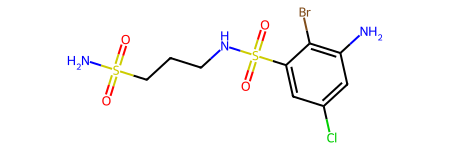

In [11]:
Chem.MolFromSmiles(decoy_smiles[sorted([(i, decoypred[i]) for i in range(len(decoypred)) if "S(=O)(=O)N" in decoy_smiles[i]], key=lambda x:-x[1])[3][0]])

In [12]:
sorted([(i, decoypred[i]) for i in range(len(decoypred)) if "S(=O)(=O)N" in decoy_smiles[i]], key=lambda x:x[1])[3][0]

14003

In [13]:
sorted([(i, decoypred[i]) for i in range(len(decoypred)) if "S(=O)(=O)N" in decoy_smiles[i]], key=lambda x:-x[1])[3]

(13336, 0.97401786)

In [3]:
depmap = pd.read_csv("NewDepMapPercentiles.csv")

/var/folders/y_/2d6q3v617qj78nxjx8b1_2wc0000gn/T/ipykernel_36468/1136793084.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  depmap = pd.read_csv("NewDepMapPercentiles.csv")


In [4]:
classes = list(depmap.columns[14:])
deppreds = {c:depmap[c].tolist() for c in classes}
ids = depmap["CompoundID"].tolist()

In [5]:
depcompounds = {
"KI-20227" : "DPC-003632",
"DBPR108" : "DPC-002095",
"Toremifene" : "DPC-006568",
"TUG-770" : "DPC-006692",
"PF-02545920" : "DPC-005026",
"SC-236" : "DPC-005838",
"A-784168" : "DPC-000202",
"Dabrafenib" : "DPC-002044",
"AM-404" : "DPC-000481",
"Nafamostat" : "DPC-004434",
"Papaverine" : "DPC-004911",
"Ketorolac" : "DPC-003621",
"Enoxolone" : "DPC-002507",
}

In [37]:
reassigns = {"Histone-arginine":"PRMT",
             "Tyrosine-protein kinase SYK":"SYK",
             "Diacylglycerol O-acyltransferase":"DGAT",
             "Glucose-dependent insulinotropic receptor":"GIPR",
             "Thromboxane A2 receptor":"TXA2",
             "Prostaglandin Receptor": "PG Receptor",
             "Other Cytochrome P450":"Other CYP450",
             "Bile acid receptor":"GPBAR1",
             "cGMP-specific" : "cGMP-specific PDE"
            }

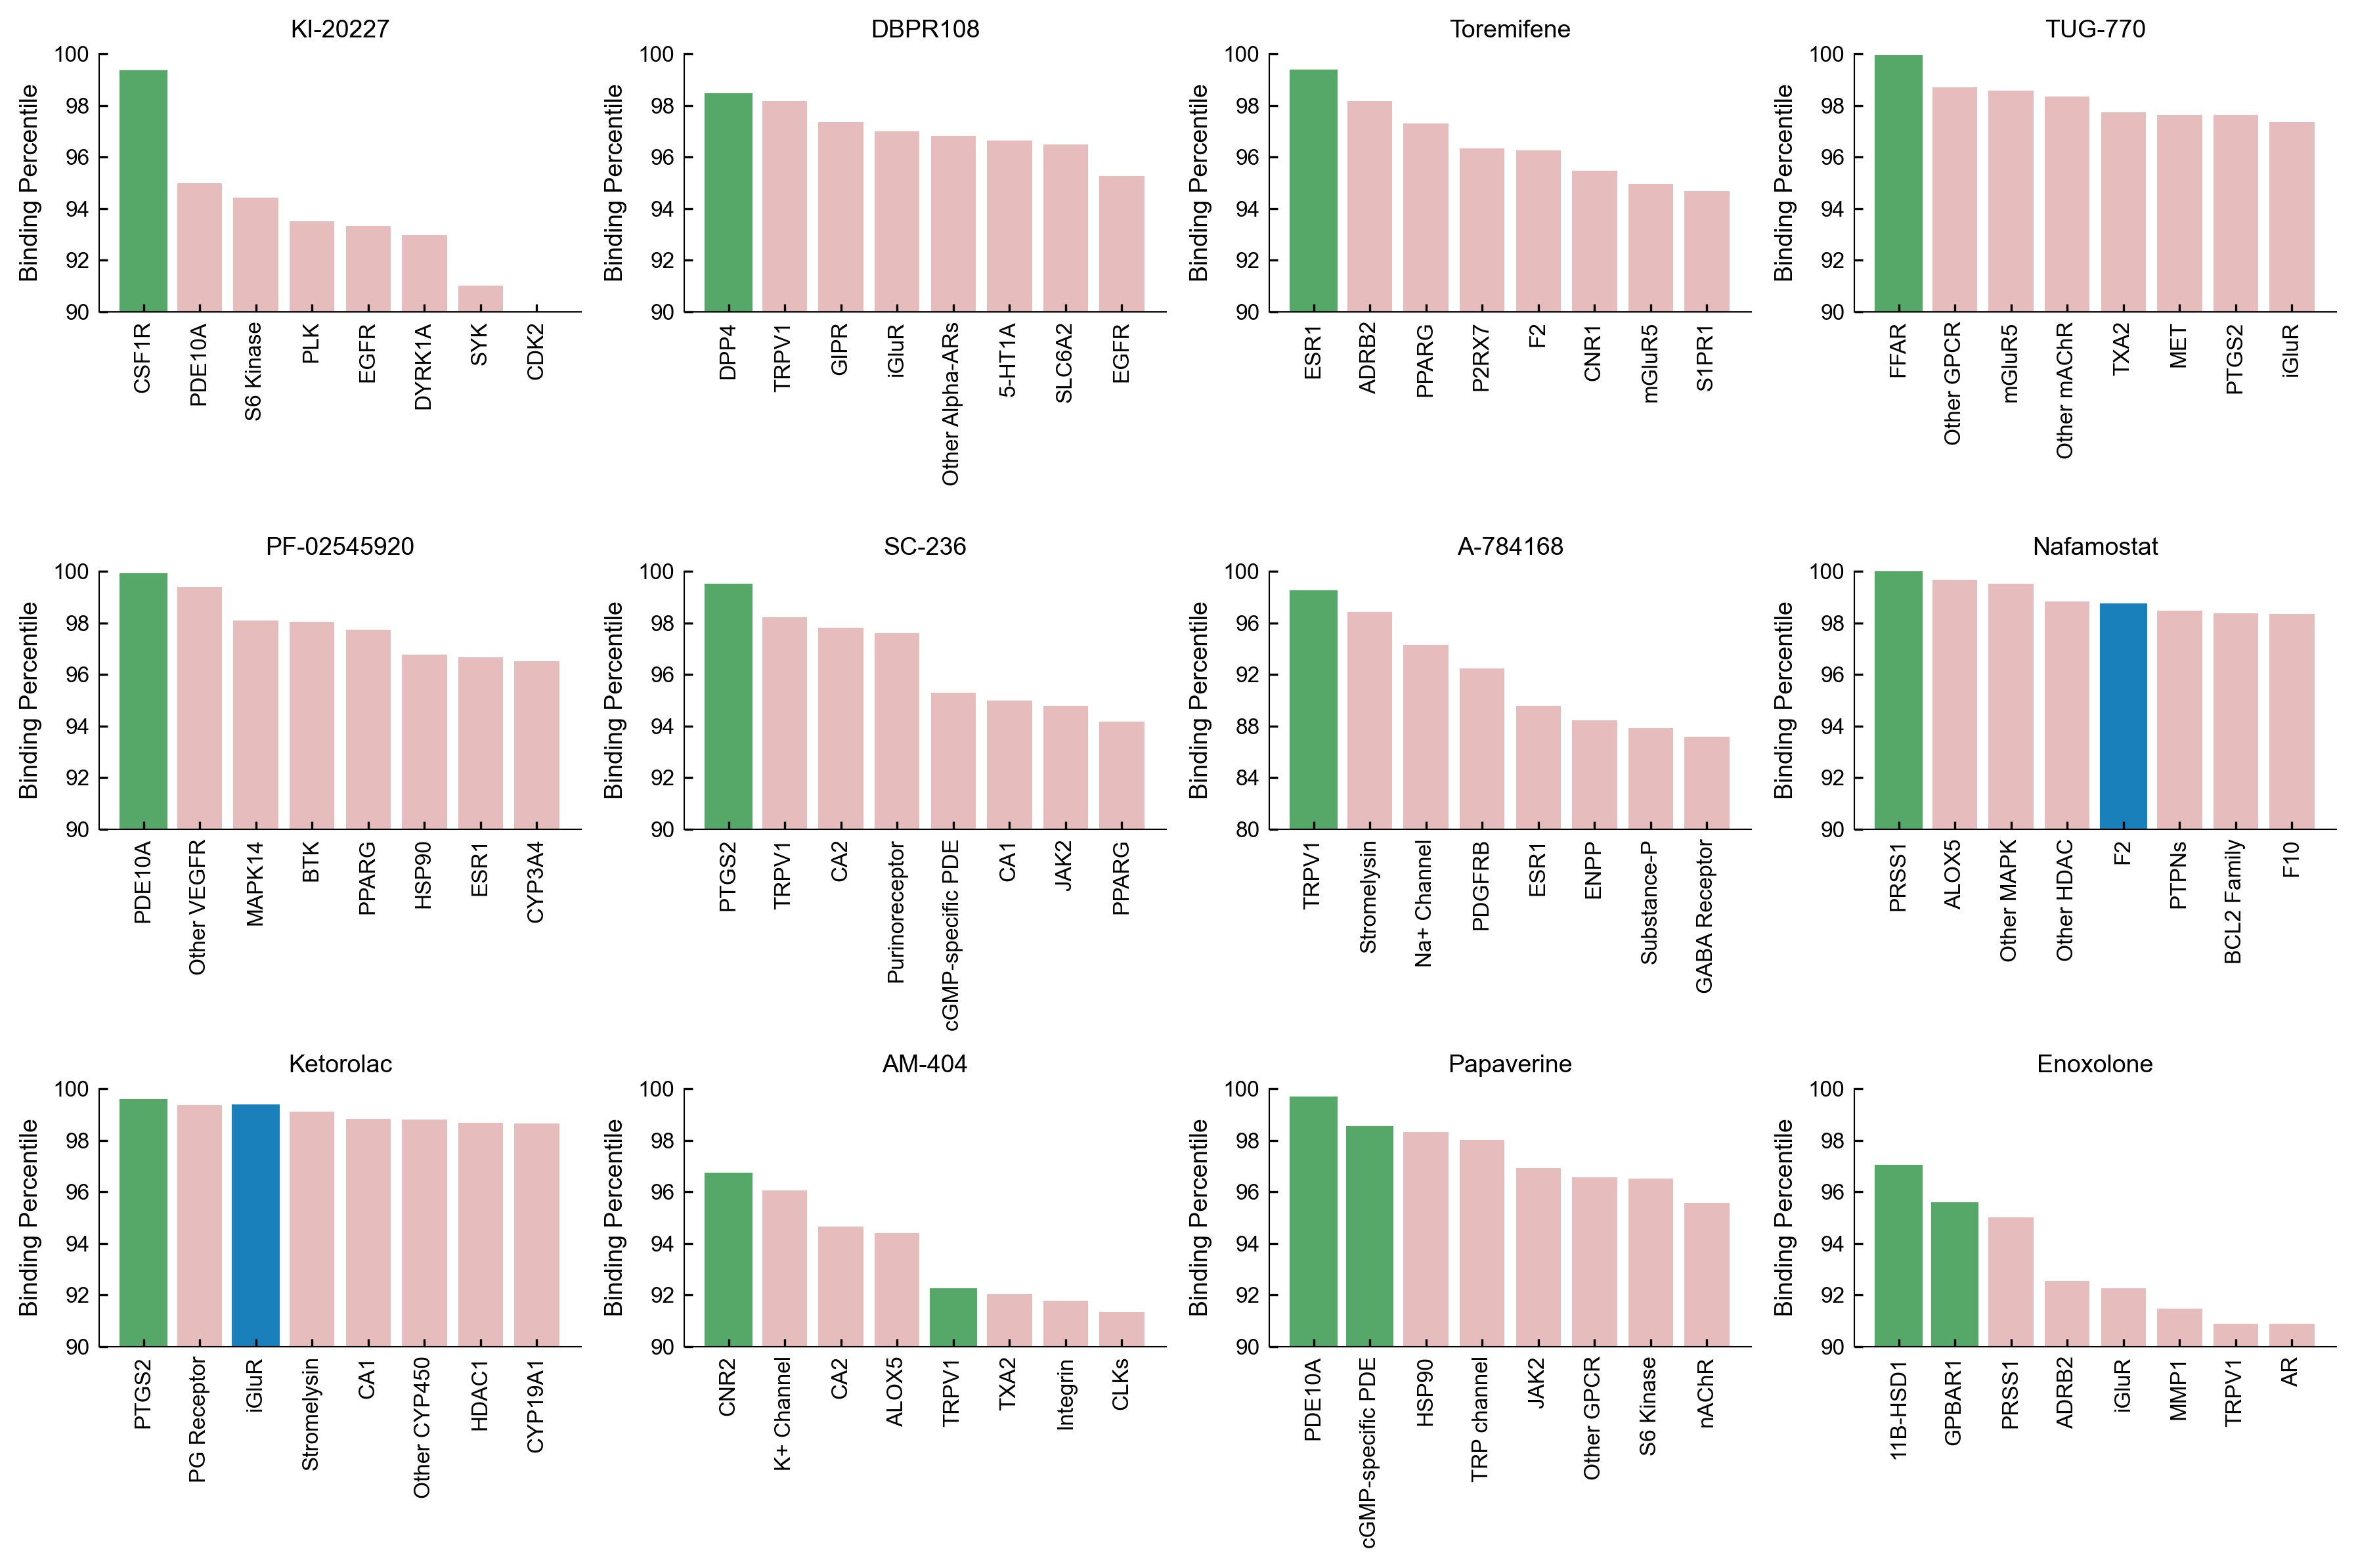

In [38]:
compounds = [["KI-20227", "DBPR108", "Toremifene", "TUG-770"], ["PF-02545920", "SC-236", "A-784168", "Nafamostat"], ["Ketorolac", "AM-404", "Papaverine", "Enoxolone"]]
greens = [[[0], [0], [0], [0]], [[0], [0], [0], [0]], [[0], [0, 4], [0, 1], [0, 1]]]
yellows = [[[], [], [], []], [[], [], [], [4]], [[2], [], [], []]]
preds = [[sorted([(c, deppreds[c][ids.index(depcompounds[compounds[i][j]])]) for c in classes], key=lambda x:-x[1]) for j in range(4)] for i in range(3)]
# Set figure size to single column width (inches)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
#fig.set_figwidth(25)
# Scatter plot with Nature-style marker
for i in range(3):
    for j in range(4):
        barlist=ax[i][j].bar([reassigns[y] if y in reassigns else y for y in [x[0] for x in preds[i][j]][:8]], [x[1]*100 for x in preds[i][j]][:8],color='#e7bcbc')
        for g in greens[i][j]:
            barlist[g].set_color('#55A868')
        for y in yellows[i][j]:
            barlist[y].set_color("#1a80bb")
        # Axis labels
        #ax[i][j].set_xlabel("Subclass", labelpad=4)
        ax[i][j].set_ylabel("Binding Percentile", labelpad=4)
        # Minor ticks

        # Remove top/right spines (redundant with rcParams, but explicit here)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)

        ax[i][j].set_title(compounds[i][j])
        ax[i][j].tick_params("x", rotation=90)
        ax[i][j].set_ylim(90, 100)
        ax[i][j].set_yticks(np.arange(90, 102, 2))
        if i == 1 and j == 2:
            ax[i][j].set_ylim(80, 100)
            ax[i][j].set_yticks(np.arange(80, 102, 4))


#ax.yaxis.set_minor_locator(plt.ticker.AutoMinorLocator())
# Tight layout for better spacing
plt.tight_layout()

# Show or save the figure
plt.show()

In [10]:
targets = [x.split(";") if type(x) == type("a") else [x] for x in depmap["GeneSymbolOfTargets"].tolist()]

In [11]:
total_targets = set(item for sublist in targets for item in sublist)

In [12]:
setclasses = set(classes)

In [13]:
aliases = {x:x for x in classes}
aliases["ACACB"] = "ACC2"

In [14]:
testindices = [i for i,x in enumerate(targets) if not set([aliases[y] if y in aliases else y for y in x]).isdisjoint(setclasses)]

In [15]:
ranks = []
for i in testindices:
    testtargets = targets[i]
    sortclasses = sorted(classes, key=lambda x: -deppreds[x][i])
    minrank = len(classes)
    for t in testtargets:
        try:
            minrank = min(minrank, sortclasses.index(aliases[t])+1)
        except ValueError:
            continue
        except KeyError:
            continue
    ranks.append(minrank)

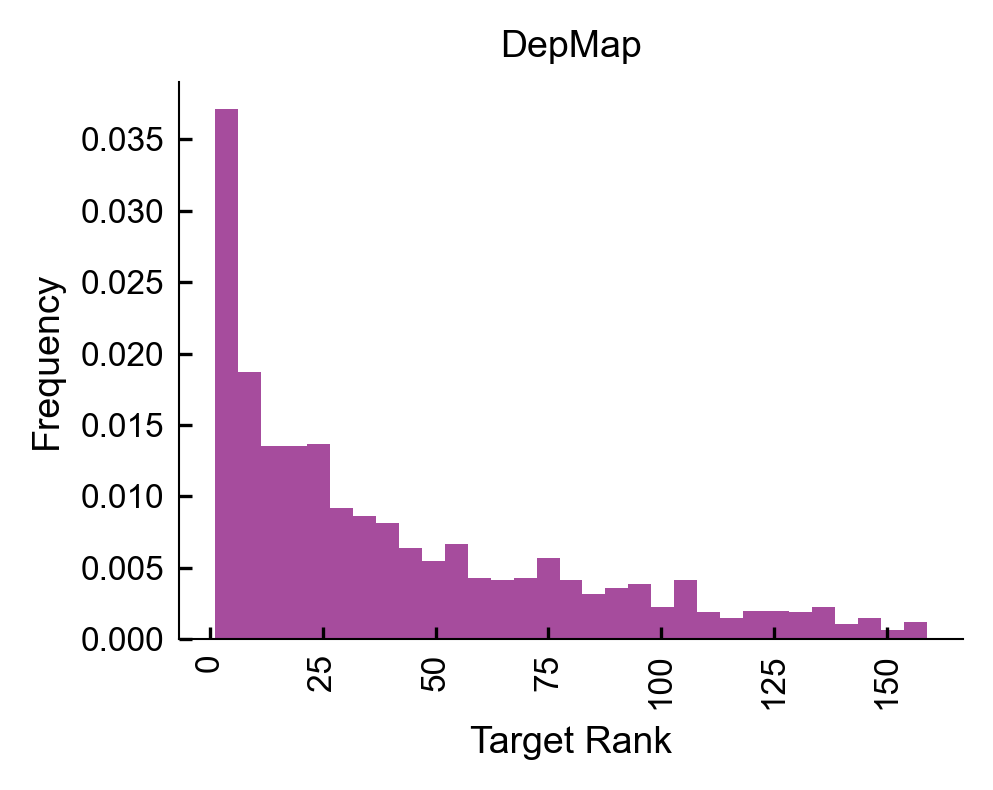

In [16]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))
#fig.set_figwidth(25)
# Scatter plot with Nature-style marker
ax.hist(ranks, bins=len(classes)//5, color='#800074', alpha=0.7, density=True)

# Axis labels
ax.set_xlabel("Target Rank", labelpad=4)
ax.set_ylabel("Frequency", labelpad=4)
# Minor ticks

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=90)
#ax.yaxis.set_minor_locator(plt.ticker.AutoMinorLocator())
# Tight layout for better spacing
plt.tight_layout()
ax.set_title("DepMap")
# Show or save the figure
plt.show()

In [17]:
stats.kstest([r/158 for r in ranks], 'uniform')

KstestResult(statistic=0.37196176838354944, pvalue=4.924402181930272e-184, statistic_location=0.2721518987341772, statistic_sign=1)

In [18]:
len(testindices)

1478

In [19]:
sorted(classes)

['11B-HSD1',
 '5-HT1A',
 '5-HT2A',
 'ABL',
 'ACC2',
 'ACHE',
 'ADORA3',
 'ADRB2',
 'ALOX5',
 'APP',
 'AR',
 'ATP-dependent translocase ABCB1',
 'AURKA',
 'Aldo-keto reductase',
 'BACE1',
 'BCHE',
 'BCL2 Family',
 'BRD4',
 'BTK',
 'Bile acid receptor',
 'CA1',
 'CA12',
 'CA2',
 'CC Chemokine Receptor',
 'CDK2',
 'CHRM2',
 'CLKs',
 'CNR1',
 'CNR2',
 'CSF1R',
 'CTSL',
 'CXC Chemokine Receptor',
 'CYP19A1',
 'CYP2D6',
 'CYP3A4',
 'Casein Kinase',
 'Coagulation factor',
 'DPP4',
 'DRD1',
 'DRD2',
 'DYRK1A',
 'Diacylglycerol O-acyltransferase',
 'Dual specificity mitogen-activated protein kinase kinase',
 'EGFR',
 'ENPP',
 'EPHX2',
 'ESR1',
 'F10',
 'F2',
 'FAAH1',
 'FFAR',
 'FGFR1',
 'FLT3',
 'GABA Receptor',
 'GSK3B',
 'Glucose-dependent insulinotropic receptor',
 'HDAC1',
 'HDAC3',
 'HDAC6',
 'HRH1',
 'HRH3',
 'HSP90',
 'Histone-arginine',
 'IDO1',
 'IRAKs',
 'Inhibitor',
 'Insulin',
 'Integrin',
 'JAK2',
 'K+ Channel',
 'KDM1A',
 'KDR',
 'KIT',
 'Kallikrein',
 'LCK',
 'LRRK2',
 'MAOB',
 

In [20]:
bindPs = []
nonbindPs = []
for c in classes:
    b = []
    n = []
    for i in testindices:
        if c in targets[i]:
            b.append(deppreds[c][i])
        else:
            n.append(deppreds[c][i])
    bindPs.append(b)
    nonbindPs.append(n)

In [21]:
testclassindices = []
delta_means = []
p_values = []
for i in range(len(bindPs)):
    if len(bindPs[i]) == 0:
        print(classes[i])
        continue
    testclassindices.append(i)
    delta_means.append(np.mean(bindPs[i]) - np.mean(nonbindPs[i]))
    _, p_value_greater = stats.mannwhitneyu(bindPs[i], nonbindPs[i], alternative='greater')
    p_values.append(p_value_greater)

hERG
Other MAPK
5-HT1A
Other CDK
Other 5HT Receptor
Other GPCR
Integrin
CC Chemokine Receptor
Prostaglandin Receptor
Other Cytochrome P450
Na+ Channel
Other Cathepsin
Other Prostaglandin Synthase
PTPNs
ABL
RAF
5-HT2A
FFAR
11B-HSD1
Other mAChR
VDCC
Other SLC transporter
iGluR
ENPP
RORG
Other PI Kinase
FAAH1
BCL2 Family
CXC Chemokine Receptor
MCH1
NPY Receptor
Other VEGFR
Other Alpha-ARs
Other HDAC
Other mGluR
mGluR5
K+ Channel
Kallikrein
TRP channel
Purinoreceptor
Casein Kinase
Other NR family
SERT
ACC2
MGL
OX1R
PKC
Stromelysin
S1PRs
RIPKs
HSP90
Other Dopamine Receptor
nAChR
S6 Kinase
IRAKs
Other Histamine Receptor
Diacylglycerol O-acyltransferase
Tyrosine-protein kinase SYK
TLRs
RAC
ATP-dependent translocase ABCB1
Proto-oncogene tyrosine-protein kinase receptor Ret
Insulin
Substance-P
CLKs
X-box-binding
Dual specificity mitogen-activated protein kinase kinase
STK
Bile acid receptor
cGMP-specific
Other ESR/ERR
Coagulation factor
Peroxisome
Serine/threonine-protein kinase mTOR
GABA Recep

In [22]:
adj_p_values = false_discovery_control(p_values, method='bh')
nlog_adj_p_values = [-math.log10(p) for p in adj_p_values]

In [23]:
len([x for x in adj_p_values])

75

In [24]:
len([x for x in adj_p_values if x < 0.05])

50

In [25]:
sorted([(classes[testclassindices[i]], delta_means[i]) for i in range(len(delta_means))], key
       =lambda x:-x[1])

[('CA2', 0.3928343156759367),
 ('PRSS1', 0.39110781220747115),
 ('CSF1R', 0.3828789501246532),
 ('HRH3', 0.3560606980313614),
 ('CA12', 0.3331460425231585),
 ('MAOB', 0.3322136906151788),
 ('NAMPT', 0.32921681951291487),
 ('SIGMAR1', 0.3071357854508403),
 ('MMP1', 0.28804836324754457),
 ('ADRB2', 0.2749214190097007),
 ('TYK2', 0.2719679304862778),
 ('CA1', 0.269581224851691),
 ('MMP9', 0.26678318862517114),
 ('DPP4', 0.26598207407645125),
 ('OPRK1', 0.25485851867567233),
 ('HRH1', 0.25102277411190455),
 ('ALOX5', 0.2509865304156448),
 ('ROCK2', 0.24346944490436273),
 ('TRPV1', 0.23598756542221078),
 ('SLC6A2', 0.2281952150144857),
 ('HDAC3', 0.22753571808112727),
 ('CYP19A1', 0.22384621891246126),
 ('SRC', 0.22274584136659537),
 ('CHRM2', 0.22161392792420198),
 ('KDM1A', 0.2179755132385015),
 ('P2RX7', 0.216466170443524),
 ('MAPK14', 0.21605226808934658),
 ('HDAC1', 0.20984086462896412),
 ('FGFR1', 0.20924396012571272),
 ('PTGS2', 0.2030611722670862),
 ('S1PR1', 0.19935658914298227),
 

In [26]:
sorted([(classes[testclassindices[i]], nlog_adj_p_values[i]) for i in range(len(delta_means))], key=lambda x:-x[1])

[('HRH1', 26.48158490452457),
 ('ADRB2', 16.164757556486602),
 ('PTGS2', 13.747612070983404),
 ('CA2', 13.747612070983404),
 ('MAOB', 10.410880282837923),
 ('CHRM2', 10.229213086468059),
 ('CA1', 10.229213086468059),
 ('DRD2', 9.681932898861328),
 ('CA12', 9.54980937496019),
 ('SLC6A2', 9.122031450238516),
 ('SIGMAR1', 8.35263884418212),
 ('HRH3', 7.521185812100222),
 ('OPRK1', 6.727342455657665),
 ('ALOX5', 6.646323277914172),
 ('ESR1', 6.538729640333948),
 ('HDAC1', 5.3082426159105145),
 ('MAPK14', 5.182700514272955),
 ('TRPV1', 4.7498771498927965),
 ('CSF1R', 4.607546810091689),
 ('DPP4', 4.493568272047622),
 ('OPRM1', 4.404416738401381),
 ('PPARG', 3.9807859424325756),
 ('MMP1', 3.883780697851759),
 ('ACHE', 3.828087385437544),
 ('CYP19A1', 3.733033456385775),
 ('FGFR1', 3.614978869997775),
 ('HDAC3', 3.561950738222854),
 ('SRC', 3.465751901598328),
 ('MMP9', 3.406366445213095),
 ('ADORA3', 3.2614742049190286),
 ('AURKA', 3.1014773525008916),
 ('MMP2', 2.692483183955685),
 ('GSK3B'

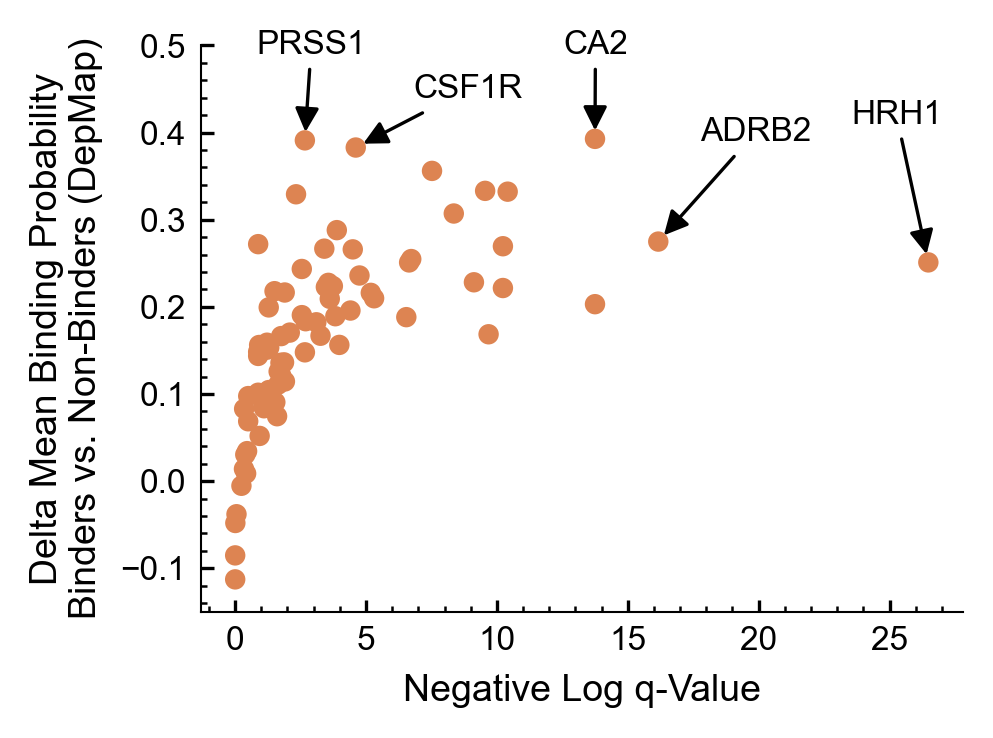

In [27]:
# Figure size for single column (Nature)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Scatter plot
ax.scatter(nlog_adj_p_values, delta_means, color="#DD8452", s=24, edgecolors='none', zorder=2)

# Axis labels
ax.set_xlabel("Negative Log q-Value", labelpad=4)
ax.set_ylabel("Delta Mean Binding Probability\nBinders vs. Non-Binders (DepMap)", labelpad=4)
ax.set_ylim((-0.15, 0.5))

# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

altnames = {"Glucose-dependent insulinotropic receptor": "GIPR", "Bile acid receptor": "GPBAR1"}
# Adjusted Annotations with more spacing to reduce overlap
for i in range(len(testclassindices)):
    name = classes[testclassindices[i]]
    if delta_means[i] > 0.38 or nlog_adj_p_values[i] > 15:
        offsets = {"CA2":(15, 0.5), "PRSS1": (5, 0.5), "CSF1R": (11, 0.45), "HRH1":(27, 0.42), "ADRB2":(22, 0.4)}
        
        ax.annotate(
            altnames[name] if name in altnames else name, xy=(nlog_adj_p_values[i], delta_means[i]), xytext=offsets[name], arrowprops=dict(
                arrowstyle='-|>', color='black', lw=0.8, shrinkA=0, shrinkB=2, mutation_scale=12
            ), fontsize=8, fontname='Arial', va='center',ha='right')
plt.tight_layout()
plt.show()